# Gemaakt op 13/05/2025 door martijn

In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeRegressor

In [133]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names=features,
                          class_names=class_names,
                          filled=True, rounded=True,
                          special_characters=True)

    graph = graphviz.Source(dot_data)

    graph.render("decision_tree")

    return graph
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names=features,
                          filled=True, rounded=True,
                          special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to
     - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
     - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.<br>
<br>

![](https://i.imgur.com/0v1CGNV.png)<br>
- Which depth and features did you add per cycle?
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?<br>
<br>

Findings: ...

In [134]:
penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


hierboven is de dataset die we gaan gebruiken :3

In [135]:
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean())
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean())

hier heb ik de NaN values van alle rows aangepast. alle numeric velden hebben nu de `mean` als waarde

In [136]:
penguins.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


we kijken hier welke numeric values ik kan gebruiken

In [137]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42) # ik heb stratify weggehaald omdat t niet logisch is om te splitten gebaseerd op species
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


nu hebben we de data gesplitst in een test dataset en training dataset.

In [138]:
features= ['bill_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 4)
dt_regression.fit(penguins_train[features].values, penguins_train['body_mass_g'].values)

DecisionTreeRegressor(max_depth=4)

nu heb ik een tree gemaakt die op basis van bill_length_mm de mass probeert te predicten

laten we nu even een boxplot maken om te kijken wat de range is van values, om een guess te kunnen maken voor de RMSE value.

<Axes: >

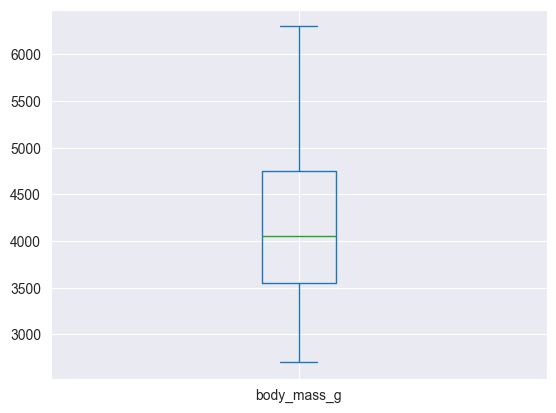

In [139]:
penguins["body_mass_g"].plot(kind="box")

ik denk dat we wel een Root mean squared error gaan krijgn van 200

nu gaan we die mooie regressor tree maken


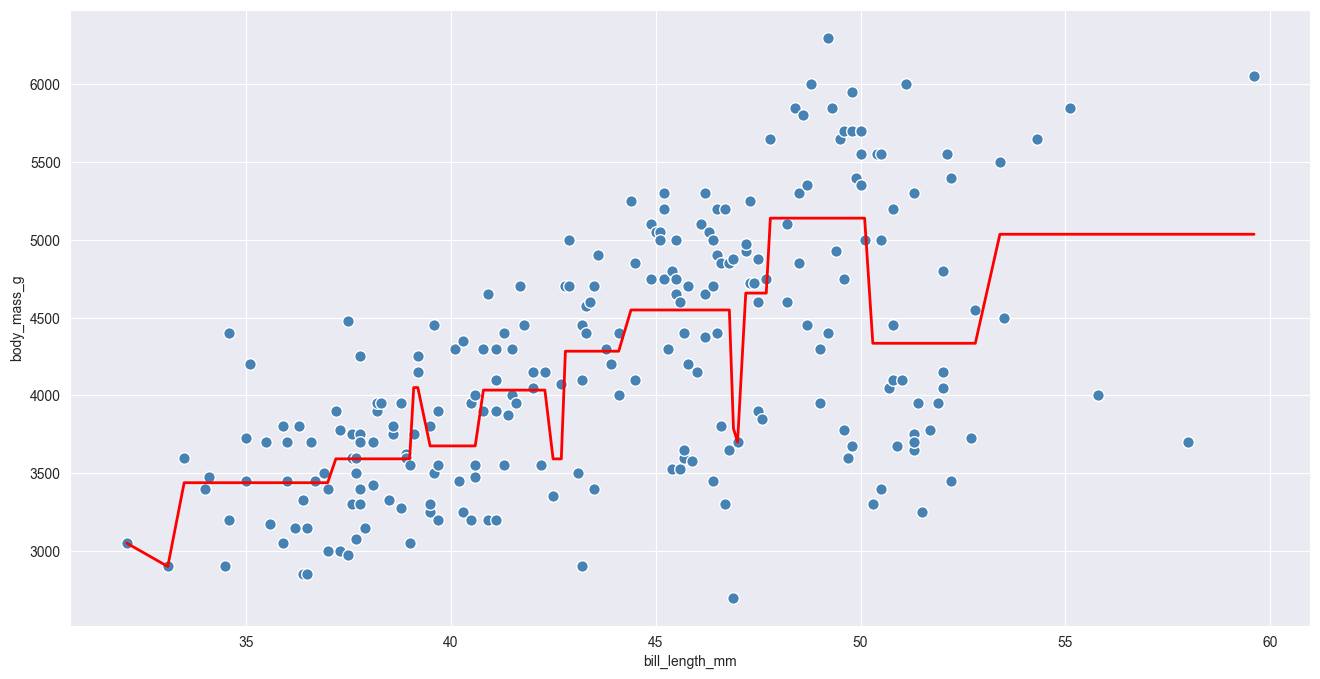

In [140]:
import matplotlib.pyplot as plt

X_train=penguins_train[features].values
y_train=penguins_train['body_mass_g'].values

sort_idx = X_train.flatten().argsort()
X_train = X_train[sort_idx]
y_train = y_train[sort_idx]

plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X_train, dt_regression.predict(X_train),
         color='red', lw=2)
plt.xlabel('bill_length_mm')
plt.ylabel('body_mass_g')
plt.show()

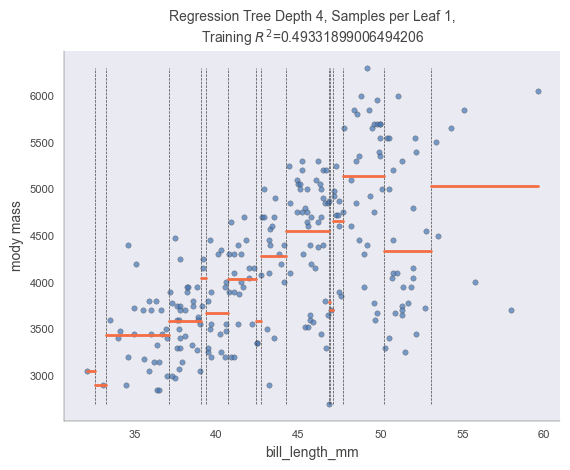

In [141]:
import dtreeviz
viz_rmodel = dtreeviz.model(dt_regression, X_train, y_train,
                            feature_names=features,
                            target_name='mody mass')
viz_rmodel.rtree_feature_space(features=features)

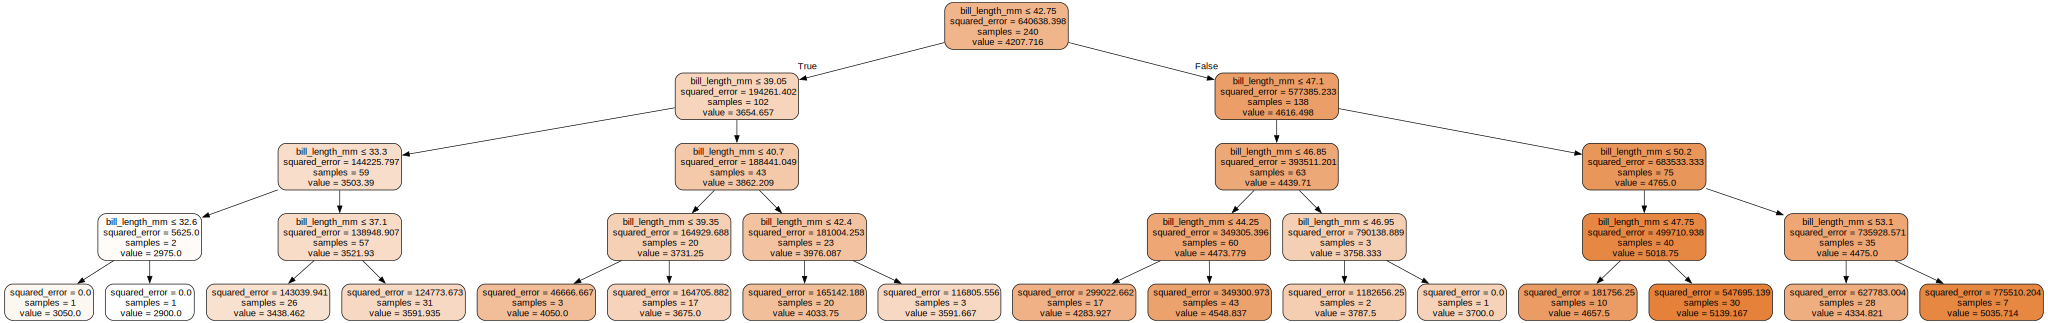

In [142]:
plot_tree_regression(dt_regression, features)

het lijkt er op alsof hij het sorteerd op squared error, de minder, de meer naar links het moet

In [143]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 569.7361763782245
RMSE on test set 702.618397317421


C:\Users\oldma\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\oldma\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names


hieruit kunnen we zien dat ik weer eens fout zit. de RMSE is 500+ en niet 200.

## findings
zoals gedacht ligt er niet veel verschil tussen de RSME van de test dataset en training dataset. Maar mijn gok van hoeveel het zou zijn is wel compleet fout